**Import libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**A helper function to plot the graphs**

In [2]:
def plotData(x, y, title):
  plt.scatter(x, y)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt.show()

**Generate training data**

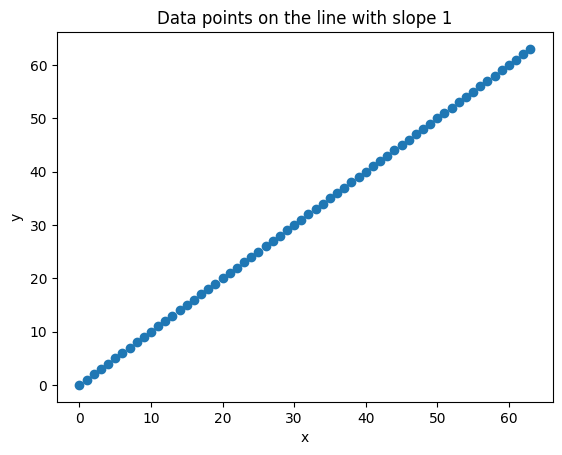

In [3]:
x = range(64)
y = range(64)
plotData(x, y, "Data points on the line with slope 1")

**Add noise and do normalization**

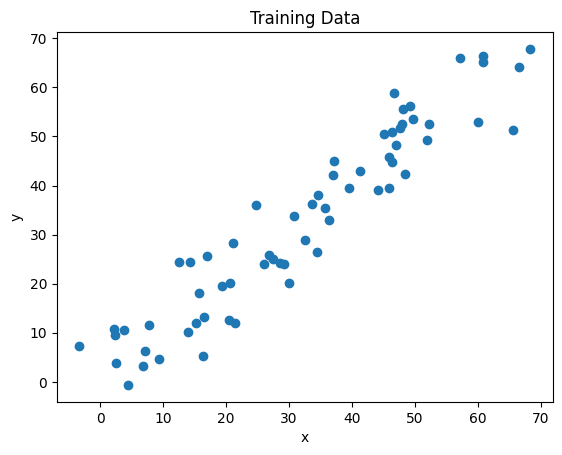

In [4]:
x_noised = x + np.random.uniform(-8, 8, 64)
y_noised = y + np.random.uniform(-8, 8, 64)
plotData(x_noised, y_noised, "Training Data")

x_min, x_max = np.min(x_noised), np.max(x_noised)
y_min, y_max = np.min(y_noised), np.max(y_noised)

x_normalized = (x_noised - x_min) / (x_max - x_min)
y_normalized = (y_noised - y_min) / (y_max - y_min)

**Define model**

In [5]:
# hyperparameters
learning_rate = 0.01
iteration = 1024

# optimizer
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

# prediction
def linear_regression(x):
    return tf.add(tf.multiply(x, w), b)

# loss function
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

**Train model**

In [6]:
# weight, bias
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# training
for i in range(iteration):
    with tf.GradientTape() as tape:
        y_pred = linear_regression(x_normalized)
        current_loss = loss(y_normalized, y_pred)
    gradients = tape.gradient(current_loss, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))

tf.print("weight(slope):", w)
tf.print("bias(intercept):", b)

weight(slope): 0.742290497
bias(intercept): 0.128687471


**Visualize result**

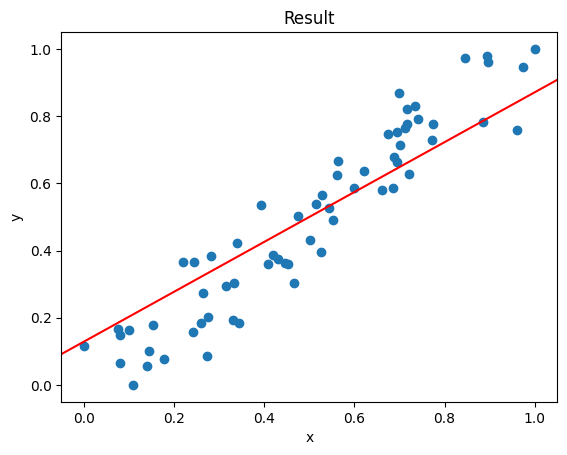

In [7]:
plt.axline((0, b), slope=w, color='r')
plotData(x_normalized, y_normalized, "Result")

**Train model**

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x_reshaped = x_normalized[:, np.newaxis]
model.fit(x_reshaped, y_normalized)

print("weight(slope):", model.coef_[0])
print("bias(intercept):", model.intercept_)

weight(slope): 1.0134925684500802
bias(intercept): -0.012834694484033404


**Visualize result**

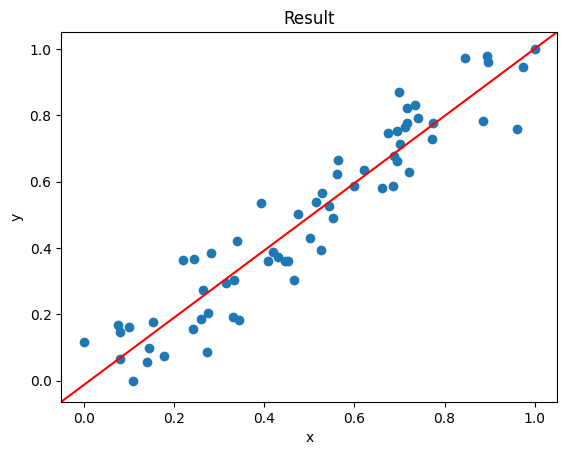

In [9]:
plt.axline((0, model.intercept_), slope=model.coef_[0], color='r')
plotData(x_normalized, y_normalized, "Result")